## KNN ASSIGNMENT
Name : Karishma Saikia

### 1.INTRODUCTION
    - Background
    - Data Description
    - Problem Statement
  

###  Background
This is a Twitter users dataset taken from Kaggle and it contains 20K rows, each with a user name, random tweet, account profile and some other relevant account information.

###  Problem Statement
How well do stylistic factors (like link color and sidebar color) predict user gender?

###  Data Description
- sidebar_color: color of the profile sidebar, as a hex value
- link_color: the link color on the profile, as a hex value
- gender: one of male, female, or brand (for non-human profiles)


### [2. DATA EXPLORATION](#DATA-EXPLORATION)
- Load data
- Created a new dataframe with target column and stylistic features
- Explored the required columns 

### [3. DATA CLEANSING](#DATA-CLEANSING)
- Deleted missing Values
- Renamed/Replaced Columns
- Converted categorical feature values

### [4. IMPLEMENT KNN AlGORITHM](#IMPLEMENT-KNN-ALGORITHM)
- Load the feature and target values
- Split Train and Test sets
- Normalize the data
- Fit Model
- Predicted Metric
- Found and fit optimal K
- Checked and Analysed accuracy

### [5. CONCLUSION](#CONCLUSION)


### DATA EXPLORATION

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 16})

twitter_df=pd.read_csv('twitter_raw_data.csv',encoding = "ISO-8859-1")
print(twitter_df.shape)
twitter_df.head()

(20008, 26)


,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,gender,gender:confidence,profile_yn,profile_yn:confidence,created,...,profileimage,retweet_count,sidebar_color,text,tweet_coord,tweet_count,tweet_created,tweet_id,tweet_location,user_timezone
0,815719226,False,finalized,3,10/26/2015 23:24,male,1.0000,yes,1.0,12/5/2013 1:48,...,https://pbs.twimg.com/profile_images/414342229...,0,FFFFFF,Robbie E Responds To Critics After Win Against...,NaN,110964,10/26/2015 12:40,6.590000e+17,main; @Kan1shk3,Chennai
1,815719227,False,finalized,3,10/26/2015 23:30,male,1.0000,yes,1.0,10/1/2012 13:51,...,https://pbs.twimg.com/profile_images/539604221...,0,C0DEED,ÛÏIt felt like they were my friends and I was...,NaN,7471,10/26/2015 12:40,6.590000e+17,NaN,Eastern Time (US & Canada)
2,815719228,False,finalized,3,10/26/2015 23:33,male,0.6625,yes,1.0,11/28/2014 11:30,...,https://pbs.twimg.com/profile_images/657330418...,1,C0DEED,i absolutely adore when louis starts the songs...,NaN,5617,10/26/2015 12:40,6.590000e+17,clcncl,Belgrade
3,815719229,False,finalized,3,10/26/2015 23:10,male,1.0000,yes,1.0,6/11/2009 22:39,...,https://pbs.twimg.com/profile_images/259703936...,0,C0DEED,Hi @JordanSpieth - Looking at the url - do you...,NaN,1693,10/26/2015 12:40,6.590000e+17,"Palo Alto, CA",Pacific Time (US & Canada)
4,815719230,False,finalized,3,10/27/2015 1:15,female,1.0000,yes,1.0,4/16/2014 13:23,...,https://pbs.twimg.com/profile_images/564094871...,0,0,Watching Neighbours on Sky+ catching up with t...,NaN,31462,10/26/2015 12:40,6.590000e+17,NaN,NaN


In [6]:
#Checking the columns to select the stylistic features
print(twitter_df.columns)

new_df=twitter_df[['sidebar_color','link_color','gender']]
new_df.head()

Index(['_unit_id', '_golden', '_unit_state', '_trusted_judgments',
       '_last_judgment_at', 'gender', 'gender:confidence', 'profile_yn',
       'profile_yn:confidence', 'created', 'description', 'fav_number',
       'gender_gold', 'link_color', 'name', 'profile_yn_gold', 'profileimage',
       'retweet_count', 'sidebar_color', 'text', 'tweet_coord', 'tweet_count',
       'tweet_created', 'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')


,sidebar_color,link_color,gender
0,FFFFFF,08C2C2,male
1,C0DEED,0084B4,male
2,C0DEED,ABB8C2,male
3,C0DEED,0084B4,male
4,0,3B94D9,female


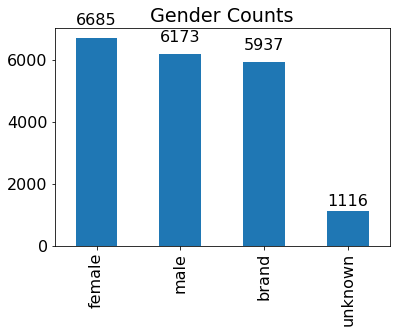

In [7]:
ax=new_df['gender'].value_counts().plot(kind='bar')
ax.set_title("Gender Counts")

rects=ax.patches

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects)

### DATA CLEANSING

It can be seen that from Data Exploration, there are 1116 unknown values in gender. There can be two possibilities, either the users do not want to disclose or they did not mention.<br>
Let us first see the Null values, if there are Null values in Gender, it means that users who did not mention their gender is captured as Null Values


The Null values are checked and then deleted in the target & feature column 

In [8]:
print(f"NaN in Gender: {new_df['gender'].isna().sum()}")
print(f"NaN in Side bar color : {new_df['sidebar_color'].isna().sum()}")
print(f"NaN in Link color : {new_df['link_color'].isna().sum()}")

new_df=new_df.dropna(how='any')


NaN in Gender: 97
NaN in Side bar color : 0
NaN in Link color : 0


In [9]:
#Re check the NaN values
print(f"NaN in Gender: {new_df['gender'].isna().sum()}")

NaN in Gender: 0


Replacing 1117 observations of ***Unknown*** gender with ***Not disclosed***

In [10]:
new_df['gender'] = new_df['gender'].replace({'unknown':'not disclosed'})
new_df['gender'].value_counts()

female           6685
male             6173
brand            5937
not disclosed    1116
Name: gender, dtype: int64

For KNN, the datatypes of feature variables should be numbers but here it is in Hexadecimal format.<br>
So, the Hex formatted colors are changed to numbers for both the features with ***int()*** function with base 16.<br>
Since there are two features with similar formatting, a function is defined to calculate and save corresponding decimal values

In [11]:
sidebar_color_values=new_df["sidebar_color"].values
link_color_values=new_df["link_color"].values

In [12]:
def hexto_dec(val):
    color=[]
    x=len(val)

    for i in range(x):
        y=val[i]
        value=int(y,16)
        color.append(value)
    return(color)
    
    
sidebar_color=hexto_dec(sidebar_color_values)
link_color=hexto_dec(link_color_values)

In [13]:
new_df["sidebar_color"]=sidebar_color
new_df["link_color"]=link_color

### IMPLEMENT KNN ALGORITHM
The target and feature values are loaded in ***X*** and ***y*** respectively

In [14]:
X=new_df.iloc[:, 0:-1]
y=new_df["gender"]

### Split Train & Test data
Split the data with 30% as Test data and 70% as Training data.

In [23]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

### Scaling of the data

In [24]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test) 

### Fit Model
Now the model is fit with training data and a value of nearest neigbours = 141 is taken<br>
This value is obtained from theoritical definition of calculating k nearest neighbors. This is the square root of the observations

In [25]:
import math
math.sqrt(len(new_df['sidebar_color']))

141.10634287656953

In [26]:
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=141)  
classifier.fit(X_train, y_train)  

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=141, p=2,
                     weights='uniform')

**Checking the accuracy of the model by calculating classification report and confusion matrix with theoritical value of K**

In [27]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = classifier.predict(X_test)  
print(np.mean(y_pred != y_test))
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

0.597254770672916
[[977 388 433   0]
 [746 900 399   0]
 [797 464 529   0]
 [201  80  60   0]]
               precision    recall  f1-score   support

        brand       0.36      0.54      0.43      1798
       female       0.49      0.44      0.46      2045
         male       0.37      0.30      0.33      1790
not disclosed       0.00      0.00      0.00       341

     accuracy                           0.40      5974
    macro avg       0.31      0.32      0.31      5974
 weighted avg       0.39      0.40      0.39      5974



C:\Users\karis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


We see that the precision/recall/f1-score is very less, so need to check with different values of K

### Optimal value of K
Loop through different k values to see which has the minimum error and then select the optimal value of nearest neigbours. <br>


Text(0,0.5,'Mean Error')

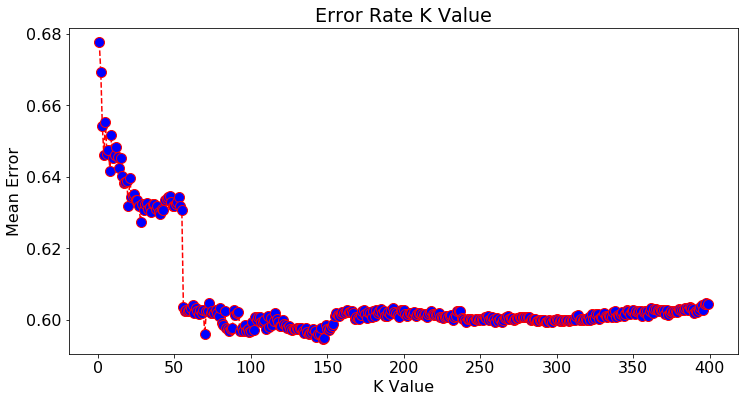

In [28]:
error = []

# Calculating error for K values between 1 and 400
for i in range(1, 400):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 400), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')     

### Now fit the optimal K
From the graph we see that the optimal value is around 55. We select an odd number to avoid ties.<br>
Calculated the accuracy score, however Classification matrix and Confusion matrix gives more accurate results.

In [30]:
classifier = KNeighborsClassifier(n_neighbors=55)  
classifier.fit(X_train, y_train)  

y_pred = classifier.predict(X_test)  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

print(f"Accuracy score: {knn.score(X_test,y_test)}")

[[ 131  458 1209    0]
 [  88  942 1015    0]
 [ 117  539 1134    0]
 [  13   81  247    0]]
               precision    recall  f1-score   support

        brand       0.38      0.07      0.12      1798
       female       0.47      0.46      0.46      2045
         male       0.31      0.63      0.42      1790
not disclosed       0.00      0.00      0.00       341

     accuracy                           0.37      5974
    macro avg       0.29      0.29      0.25      5974
 weighted avg       0.37      0.37      0.32      5974



C:\Users\karis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Accuracy score: 0.3957147639772347


### Intepretation of accuracy of the model
- For the class brand, out of 1798 observations, 131 were correctly predicted and rest were predicted in other classes.
- For the class Female, only 942 were correctly predicted out of 2045 and for male, 1134 out of 1790 were predicted.
- For not-disclosed gender category, none of them were correctly predicted.


### CONCLUSION
**Stylistic factors of Twitter user accounts predicts the gender of the user with an approximate accuracy of only 39.6%, So this model cannot be accepted**
